### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
from sklearn import metrics
from sklearn.metrics import r2_score
import knn_impute as knn
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [4]:
#train.isnull().sum()

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

In [7]:
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#temp = train['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt'] 

cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']

temp = train[cols]

In [9]:
temp.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


In [10]:
temp.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [11]:
y = temp["SalePrice"]
X = temp.drop("SalePrice",axis = 1)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)
print(r2_score(y, y_pred_linear))

0.770302545034713


In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)
y_pred_logistic = classifier.predict(X)
print(r2_score(y, y_pred_logistic))

0.5678079716970292


In [16]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(X,y)
y_pred_Dtree = Dtree.predict(X)
#print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(y, y_pred_Dtree))

0.729340735707978


In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
y_pred_RF = regressor.predict(X)
print(r2_score(y, y_pred_RF))

0.9726264973676472


In [19]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred_svc = classifier.predict(X)
print(r2_score(y, y_pred_svc))

0.8690168401049132


In [20]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)
regressor.fit(X, y)
y_pred_Adaboost = regressor.predict(X)
print(r2_score(y, y_pred_Adaboost))

0.7709951598353463


In [23]:
#Import Library
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
predicted_naive= model.predict(X)
print(r2_score(y, predicted_naive))

0.8815010276525195


In [25]:
#Import Library
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier(n_neighbors=6) 
model.fit(X, y)
#Predict Output
predicted_KNN= model.predict(X)
print(r2_score(y, predicted_KNN))

0.8815010276525195


In [31]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X,y)

#Make predictions for test data
y_pred_xboost = model.predict(X)
print(r2_score(y, y_pred_xboost))

ModuleNotFoundError: No module named 'xgboost'

In [34]:
super_y = []
for a,b,c,d,e in zip(y_pred_Dtree,y_pred_RF,predicted_KNN,predicted_naive,y_pred_svc):
    super_y.append((a+b+c+d+e)/5)
print(r2_score(y, super_y))

0.9323892322162235


In [36]:
super_y = []
for a,b,c,d,e,f,g,h in zip(y_pred_linear,y_pred_logistic,y_pred_Dtree,y_pred_RF,predicted_KNN,predicted_naive,y_pred_svc,y_pred_Adaboost):
    super_y.append((a+b+c+d+e+f+g+h)/8)
print(r2_score(y, super_y))

0.902205622069897


At above code 8 regression types are applied all are done with averages compared to all the things Random forest is better so we are applying RF.

Features eliminated using data correlation and normal general idea about houses.

data_description is provided in folder.

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
y_pred_RF = regressor.predict(X)
print(r2_score(y, y_pred_RF))

0.9726264973676472


In [68]:
test = pd.read_csv("test.csv")
ids = test['Id']

In [69]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [70]:
temp.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


In [71]:
cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']

test = test[cols]

In [72]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,1.0,730.0,882.0,896,1,5,1961
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958
2,5,1629,2.0,482.0,928.0,928,2,6,1997
3,6,1604,2.0,470.0,926.0,926,2,7,1998
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992


In [73]:
X.shape

(1460, 9)

In [74]:
test.shape

(1459, 9)

In [75]:
test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

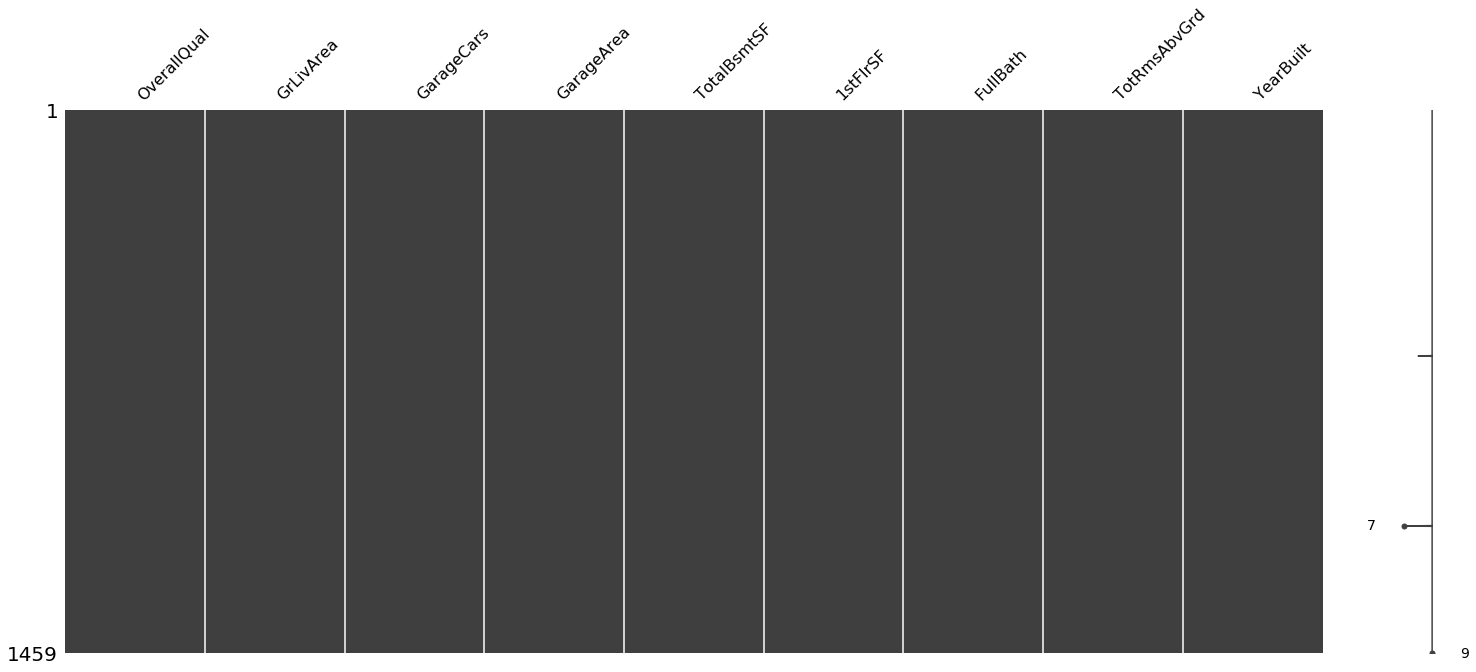

In [76]:
ms.matrix(test)

In [93]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="NaN", strategy='mean', axis=0)
test= imp.fit_transform(test)


In [101]:
y_pred_RF = regressor.predict(test)


In [97]:

y_pred_Dtree = Dtree.predict(test)


y_pred_RF = regressor.predict(test)

# Predicting the Test set results
y_pred_svc = classifier.predict(test)



y_pred_Adaboost = regressor.predict(test)


predicted_naive= model.predict(test)





predicted_KNN= model.predict(test)


In [98]:
super_y = []
for a,b,c,d,e in zip(y_pred_Dtree,y_pred_RF,predicted_KNN,predicted_naive,y_pred_svc):
    super_y.append((a+b+c+d+e)/5)


In [103]:
submission = pd.read_csv("sample_submission.csv")
submission.shape
submission.head()

,Id,SalePrice
0,1461,307540.7
1,1462,307540.7
2,1463,267325.0
3,1464,267325.0
4,1465,267325.0


In [104]:
submission['Id'] = ids
submission['SalePrice'] = y_pred_RF
submission.to_csv("sample_submission.csv", index=False)